# Ultimate Inc. Take Home Challenge
# Michael Phillips

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Part 1 - Exploratory Data Analysis

In [22]:
df = pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [24]:
df['login_time'] = pd.to_datetime(df['login_time'], format='%Y/%m/%d %H:%M:%S')
df.set_index(df['login_time'], inplace=True)
df['count'] = 1
df.head()

,login_time,count
login_time,,
1970-01-01 20:13:18,1970-01-01 20:13:18,1
1970-01-01 20:16:10,1970-01-01 20:16:10,1
1970-01-01 20:16:37,1970-01-01 20:16:37,1
1970-01-01 20:16:36,1970-01-01 20:16:36,1
1970-01-01 20:26:21,1970-01-01 20:26:21,1


In [25]:
df1 = df.resample('15T').sum()

In [26]:
df1 = df1.reset_index()

In [27]:
df1['Date'] = df1['login_time'].dt.date
df1['Time'] = df1['login_time'].dt.time
df1['dayofweek'] = df1['login_time'].dt.dayofweek

df1.head()

,login_time,count,Date,Time,dayofweek
0,1970-01-01 20:00:00,2.0,1970-01-01,20:00:00,3
1,1970-01-01 20:15:00,6.0,1970-01-01,20:15:00,3
2,1970-01-01 20:30:00,9.0,1970-01-01,20:30:00,3
3,1970-01-01 20:45:00,7.0,1970-01-01,20:45:00,3
4,1970-01-01 21:00:00,1.0,1970-01-01,21:00:00,3


In [28]:
pivot_counts = df1.pivot_table(index=['Time'], values=['count'], aggfunc=np.mean)
pivot_counts.head()

,count
Time,
00:00:00,14.107843
00:15:00,15.166667
00:30:00,14.950980
00:45:00,14.529412
01:00:00,15.186275


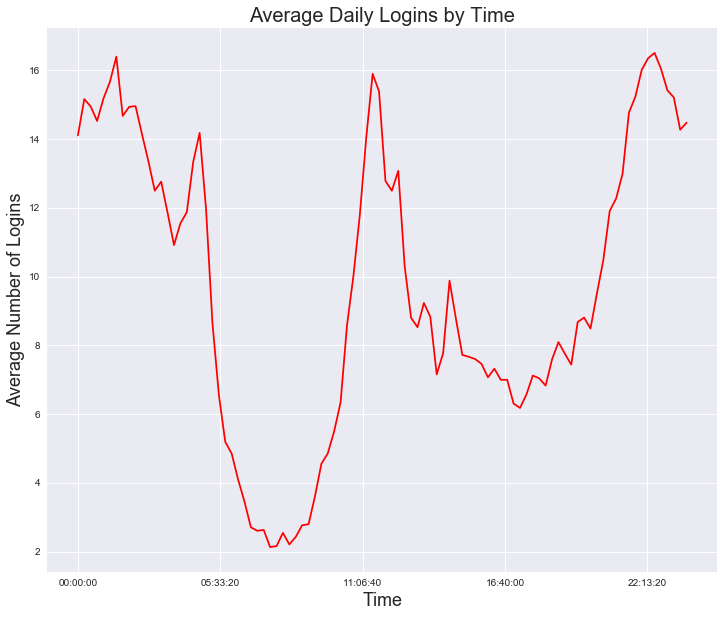

In [29]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes()

ax.plot(pivot_counts, color='red')

plt.title("Average Daily Logins by Time", fontsize=20)
plt.xlabel("Time", fontsize=18)
plt.ylabel("Average Number of Logins", fontsize=18)

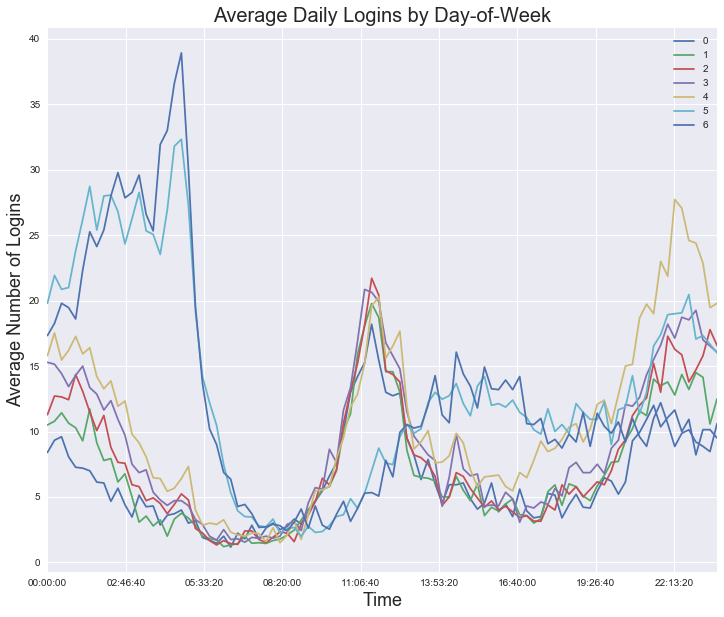

In [48]:
pivoted = pd.pivot_table(df1, values='count', columns='dayofweek', index='Time')


ax = pivoted.plot(figsize=(12,10))


lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.title("Average Daily Logins by Day-of-Week", fontsize=20)
plt.xlabel("Time", fontsize=18)
plt.ylabel("Average Number of Logins", fontsize=18)

# Part 2 - Experiment and Metric Design

# Part 3 - Predictive Modeling

In [108]:
import json
with open('ultimate_data_challenge.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [109]:
print(df['signup_date'].min())
print(df['signup_date'].max())

2014-01-01
2014-01-31


In [110]:
print(df['last_trip_date'].min())
print(df['last_trip_date'].max())

2014-01-01
2014-07-01


In [111]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'], format='%Y-%m-%d')
df['signup_date'] = pd.to_datetime(df['signup_date'], format='%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [112]:
df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [113]:
import datetime
def is_retained(date):
    
    start = pd.to_datetime('2014-6-1')
    end = pd.to_datetime('2014-7-1')
    if date <= end and date >= start:
        return 1
    else:
        return 0

In [114]:
df['retained_user'] = df['last_trip_date'].apply(is_retained)

In [115]:
df

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained_user
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,1
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,1
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,0
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,1
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0,0
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0,0
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0,0
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0,0


In [116]:
(df.retained_user.sum()) / len(df)

0.37608

37.61% of users were 'retained' according to the metrics described in the notes.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001661D39E908>]], dtype=object)

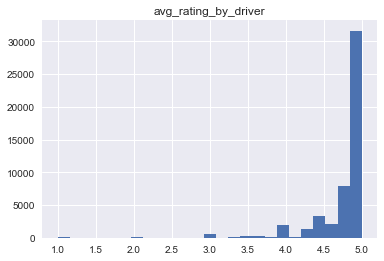

In [117]:
df.hist(column='avg_rating_by_driver', bins=25)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001662626F710>]], dtype=object)

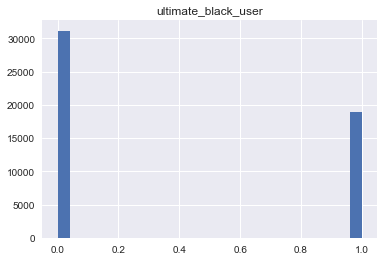

In [118]:
df.hist(column='ultimate_black_user', bins=25)

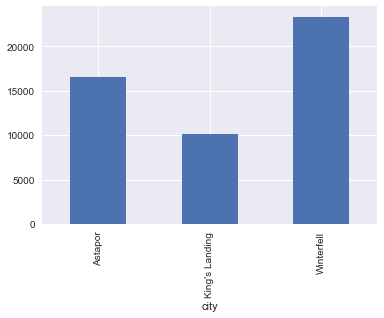

In [119]:
pivot_counts = df.groupby(['city']).count()
pivot_counts['avg_dist'].plot(kind='bar')

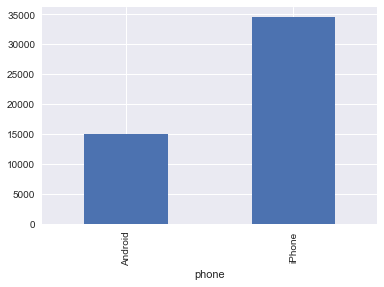

In [120]:
pivot_counts = df.groupby(['phone']).count()
pivot_counts['avg_dist'].plot(kind='bar')